<p style="
 font-family: 'Meiryo UI';
 font-size: 30px;
 padding: 20px;
 text-align: center;
 color: #ffffff;
 border-radius: 20px;
 font-weight: bold;
 background-color: #0050a0;
 ">
 Keras DNN | Road Accident Risk
 </p>

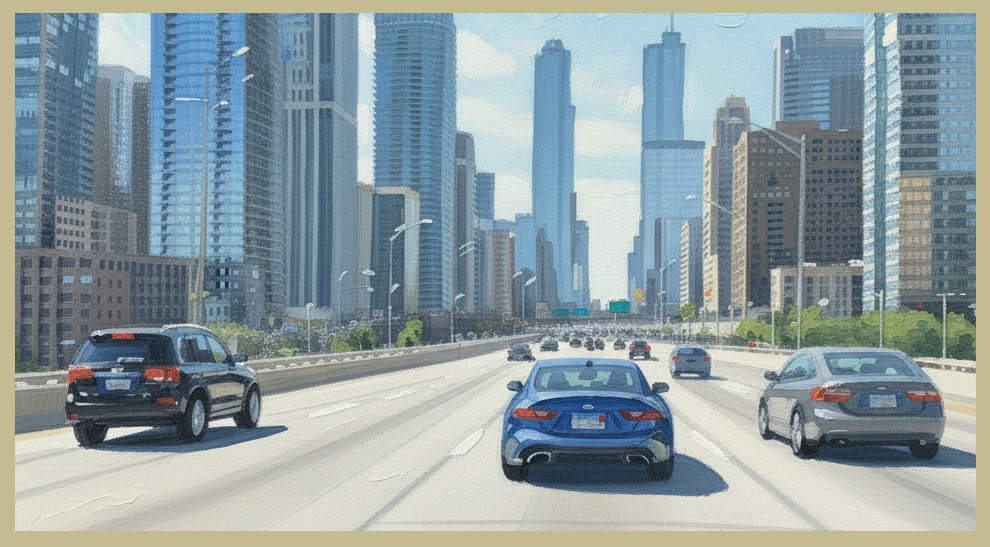

#### Version Notes
* Version 1–2 : Initial modeling and performance assessment using a basic LightGBM regressor

# <span style="font-size:3px; color:#FFFFFF;">Dataset Overview:</span>

<p style="
 font-family: 'Meiryo UI';
 font-size: 28px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #2060A0; 
 display: inline-block;
 border-radius: 5px;
 padding: 12px 100px;
 margin-left: 0px;
">
  Dataset Overview
</p>

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
 Import Libraries
</p>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from keras.models import Sequential
from keras.layers import Dense, Input, BatchNormalization, Activation, Dropout
from keras.regularizers import l2
from keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping, Callback
from keras.utils import plot_model

import warnings
warnings.filterwarnings("ignore")

2025-10-08 13:59:23.252483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759931963.502524      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759931963.566479      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
 Loading Dataset
</p>

In [2]:
# Load the Train and Test Datasets

train = pd.read_csv('/kaggle/input/playground-series-s5e10/train.csv',index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s5e10/test.csv',index_col='id')

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
Dataset Summary
</p>

In [3]:
print("Train Dataset Summary (First Rows,  Shape,  Data Types)")

display(train.head(10).T, train.shape, train.dtypes)

Train Dataset Summary (First Rows,  Shape,  Data Types)


id,0,1,2,3,4,5,6,7,8,9
road_type,urban,urban,rural,highway,rural,highway,highway,highway,rural,urban
num_lanes,2,4,4,4,1,3,1,2,3,4
curvature,0.06,0.99,0.63,0.07,0.58,0.54,0.04,0.33,0.63,0.38
speed_limit,35,35,70,35,60,70,45,45,25,45
lighting,daylight,daylight,dim,dim,daylight,night,night,daylight,dim,dim
weather,rainy,clear,clear,rainy,foggy,foggy,foggy,clear,clear,clear
road_signs_present,False,True,False,True,False,True,False,False,True,True
public_road,True,False,True,True,False,False,True,True,False,True
time_of_day,afternoon,evening,morning,morning,evening,morning,morning,evening,evening,afternoon
holiday,False,True,True,False,True,False,True,False,True,True


(517754, 13)

road_type                  object
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                   object
weather                    object
road_signs_present           bool
public_road                  bool
time_of_day                object
holiday                      bool
school_season                bool
num_reported_accidents      int64
accident_risk             float64
dtype: object

In [4]:
print("Test Dataset Summary (First Rows,  Shape,  Data Types)")

display(test.head(10).T, test.shape, test.dtypes)

Test Dataset Summary (First Rows,  Shape,  Data Types)


id,517754,517755,517756,517757,517758,517759,517760,517761,517762,517763
road_type,highway,urban,urban,rural,highway,highway,rural,urban,highway,urban
num_lanes,2,3,2,4,2,2,4,3,3,1
curvature,0.34,0.04,0.59,0.95,0.86,0.52,0.17,0.62,0.93,0.97
speed_limit,45,45,35,35,35,25,70,25,45,35
lighting,night,dim,dim,daylight,daylight,night,dim,daylight,dim,daylight
weather,clear,foggy,clear,rainy,clear,rainy,clear,clear,rainy,clear
road_signs_present,True,True,True,False,True,True,True,False,True,True
public_road,True,False,False,False,False,True,False,True,True,True
time_of_day,afternoon,afternoon,afternoon,afternoon,evening,morning,afternoon,afternoon,evening,evening
holiday,True,True,True,False,False,False,True,True,True,False


(172585, 12)

road_type                  object
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                   object
weather                    object
road_signs_present           bool
public_road                  bool
time_of_day                object
holiday                      bool
school_season                bool
num_reported_accidents      int64
dtype: object

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
Missing Values Count
</p>

In [5]:
print("Missing Values Count for Train Dataset")

train.isnull().sum()

Missing Values Count for Train Dataset


road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [6]:
print("Missing Values Count for Test Dataset")

test.isnull().sum()

Missing Values Count for Test Dataset


road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
dtype: int64

# <span style="font-size:3px; color:#FFFFFF;">EDA (Exploratory Data Analysis):</span>
<p style="
 font-family: 'Meiryo UI';
 font-size: 28px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #2060A0; 
 display: inline-block;
 border-radius: 5px;
 padding: 12px 70px;
 margin-left: 0px;
">
  EDA (Exploratory Data Analysis)
</p>

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
Distribution of Target Variable
</p>

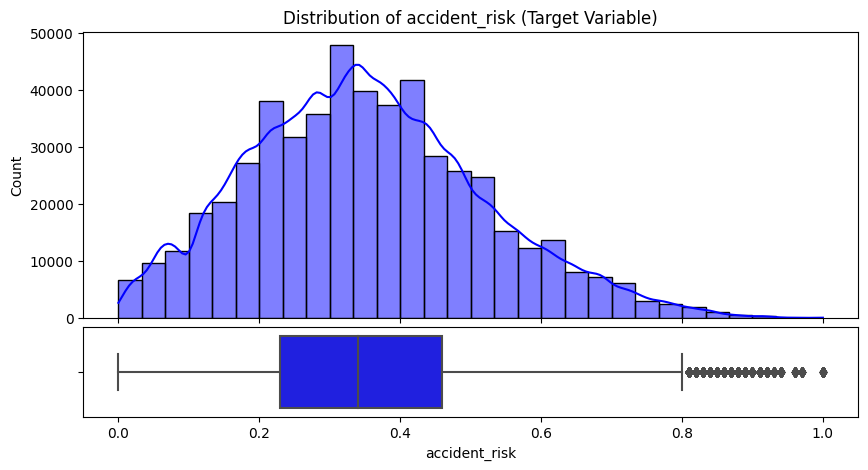

In [7]:
# Distribution of Target Variable

y_train = train['accident_risk']

fig = plt.figure(figsize=(10, 5))
grid = plt.GridSpec(4, 1, hspace=0.1) 
ax_hist = fig.add_subplot(grid[0:3, 0]) 
ax_box = fig.add_subplot(grid[3, 0], sharex=ax_hist)

sns.histplot(y_train, bins=30, kde=True, color='blue', ax=ax_hist, legend=False)
ax_hist.set_title("Distribution of accident_risk (Target Variable)")
ax_hist.set_xlabel("")

sns.boxplot(x=y_train, ax=ax_box, color='blue')
ax_box.set_xlabel("accident_risk")

plt.setp(ax_hist.get_xticklabels(), visible=False)
plt.tight_layout()
plt.show()

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
Distribution of Numeric Features
</p>

Distribution of Numeric Features (Train vs Test)


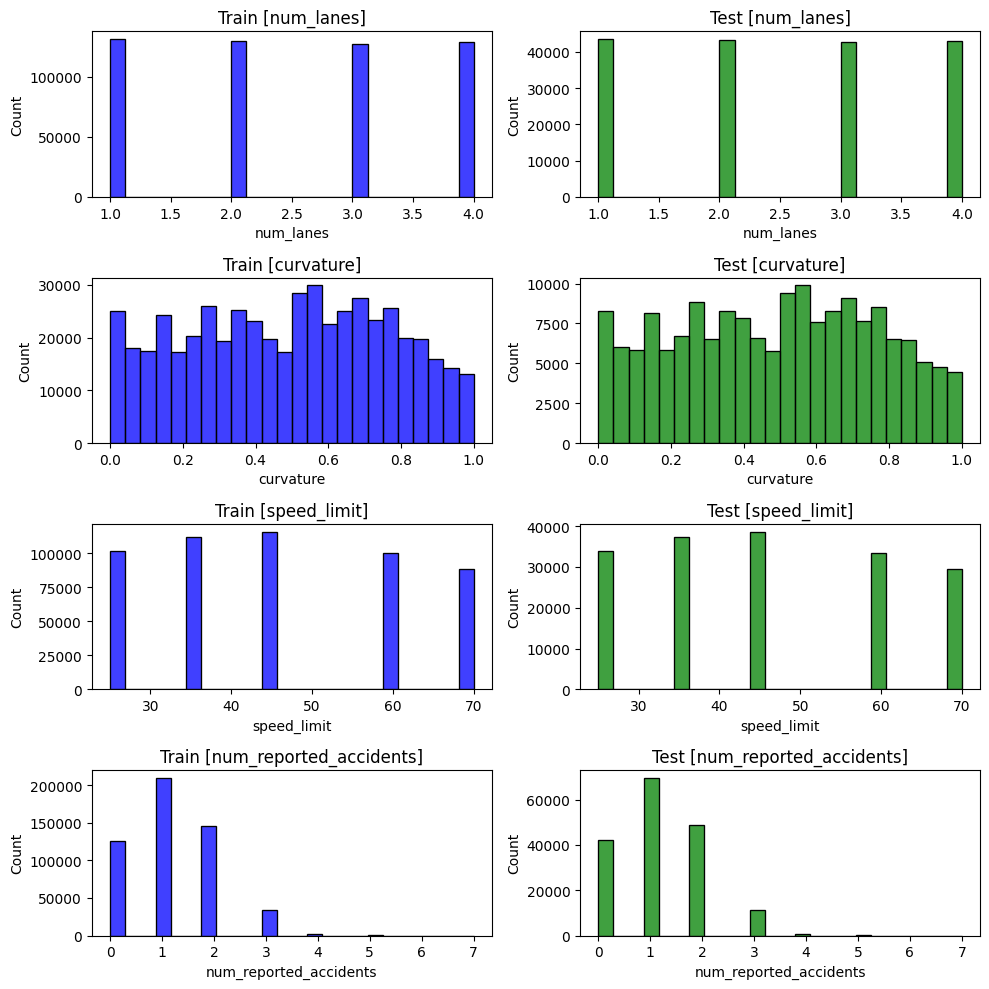

In [8]:
print("Distribution of Numeric Features (Train vs Test)")

num_cols = test.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, len(num_cols) * 2.5))

for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 2, i*2 + 1)
    sns.histplot(train[col], bins=24, color='blue')
    plt.title(f"Train [{col}]")
    plt.xlabel(col)
    
    plt.subplot(len(num_cols), 2, i*2 + 2)
    sns.histplot(test[col], bins=24, color='green')
    plt.title(f"Test [{col}]")
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
Distribution of Categorical Variables
</p>

In [9]:
print("Inspecting Unique Values in Categorical Columns\n")

categorical_columns = train.select_dtypes(include=['object', 'bool']).columns

for col in categorical_columns:
    print(f"{col} : {train[col].unique()}")
    print("-" * 50)

Inspecting Unique Values in Categorical Columns

road_type : ['urban' 'rural' 'highway']
--------------------------------------------------
lighting : ['daylight' 'dim' 'night']
--------------------------------------------------
weather : ['rainy' 'clear' 'foggy']
--------------------------------------------------
road_signs_present : [False  True]
--------------------------------------------------
public_road : [ True False]
--------------------------------------------------
time_of_day : ['afternoon' 'evening' 'morning']
--------------------------------------------------
holiday : [False  True]
--------------------------------------------------
school_season : [ True False]
--------------------------------------------------


Donut Chart Comparison of Categorical Variables in Train, Test Datasets


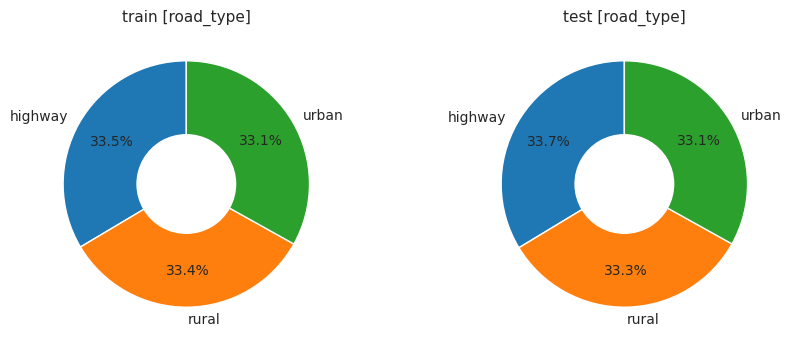

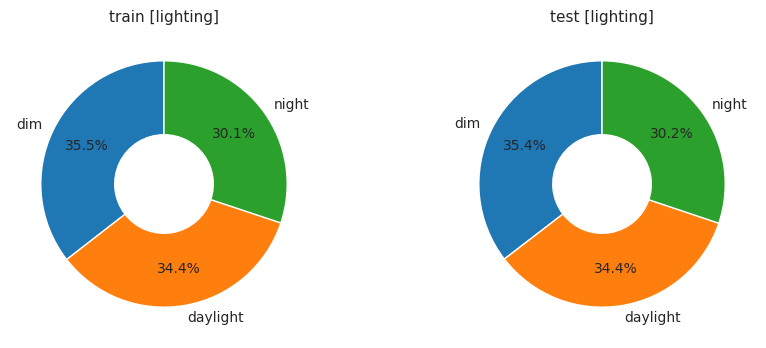

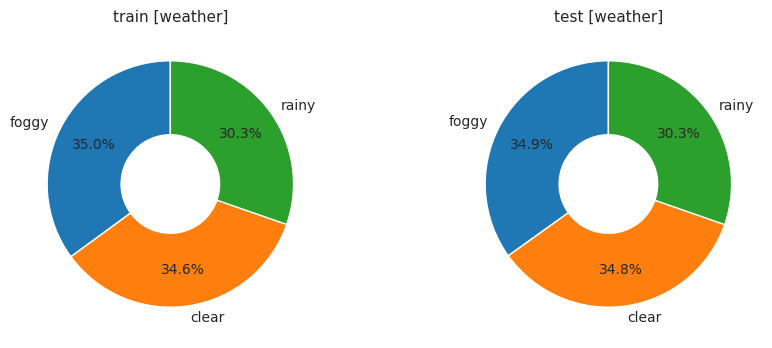

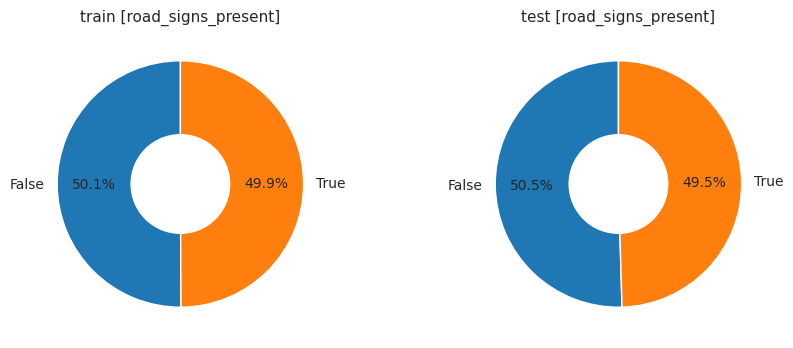

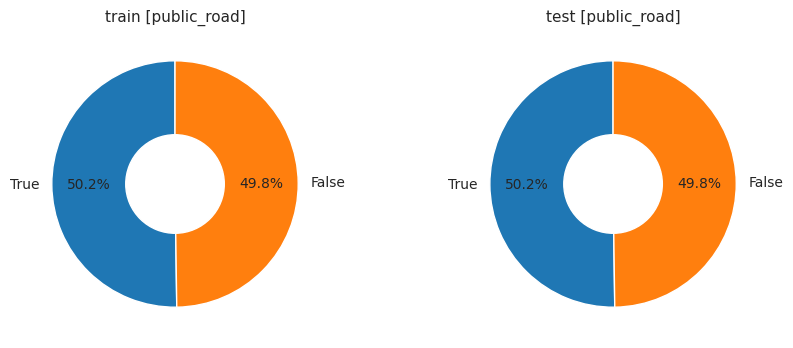

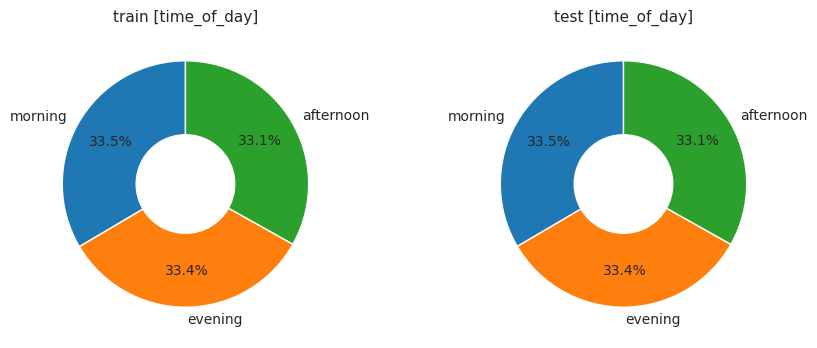

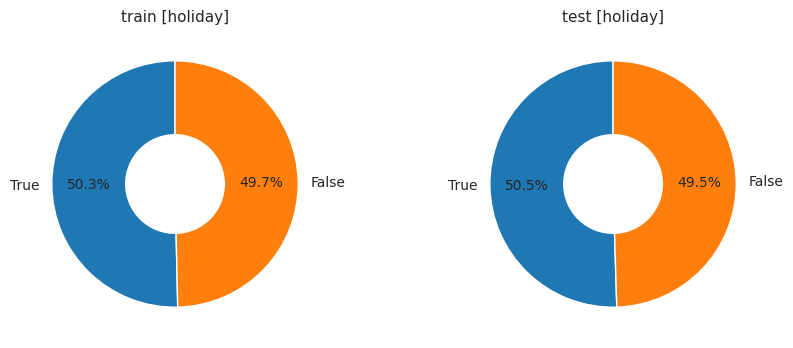

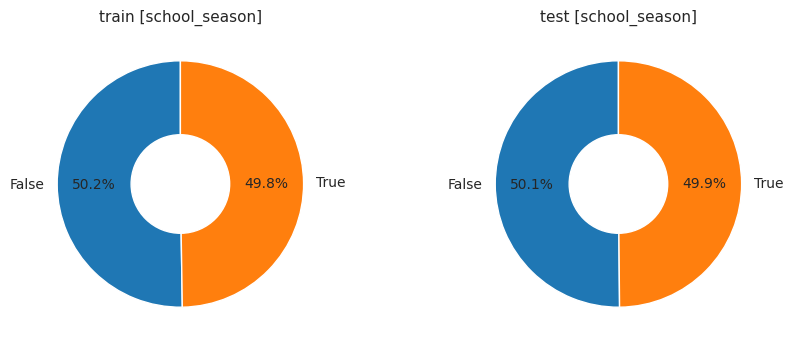

In [10]:
print("Donut Chart Comparison of Categorical Variables in Train, Test Datasets")

# Get the columns with object data type
obj_cols = train.select_dtypes(include=['object', 'bool']).columns

for variable in obj_cols:
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    plt.subplots_adjust(wspace=0.3)
    
    # Donut Chart for Train data
    train[variable].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6), pctdistance=0.7)
    axes[0].set_ylabel('')
    axes[0].set_title(f"train [{variable}]", fontsize=11)
    
    # Donut Chart for Test data
    test[variable].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6), pctdistance=0.7)
    axes[1].set_ylabel('')
    axes[1].set_title(f"test [{variable}]", fontsize=11)
        
    plt.show()

# <span style="font-size:3px; color:#FFFFFF;">Data Preprocessing:</span>
<p style="
 font-family: 'Meiryo UI';
 font-size: 28px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #2060A0; 
 display: inline-block;
 border-radius: 5px;
 padding: 12px 120px;
 margin-left: 0px;
">
Data Preprocessing
</p>

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
Ordinal Encoding of Categorical Features
</p>

In [11]:
# List of columns that will be encoded with ordinal values
ordinal_columns = [
    'road_type',
    'lighting',
    'weather',
    'time_of_day',
]

# Specify the order of categories for each column
ordinal_categories = [
    ['rural', 'urban', 'highway'],         # road_type
    ['daylight', 'dim', 'night'],          # lighting
    ['clear', 'rainy', 'foggy'],           # weather
    ['morning', 'afternoon', 'evening'],   # time_of_day
]

# Create an instance of OrdinalEncoder with the specified categories
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)

# Apply the OrdinalEncoder to the training data and test data
train[ordinal_columns] = ordinal_encoder.fit_transform(train[ordinal_columns]).astype('int8')
test[ordinal_columns] = ordinal_encoder.transform(test[ordinal_columns]).astype('int8')


In [12]:
print("Train Dataset Summary (First Rows,  Shape,  Data Types)")

display(train.head(10).T, train.shape, train.dtypes)

Train Dataset Summary (First Rows,  Shape,  Data Types)


id,0,1,2,3,4,5,6,7,8,9
road_type,1,1,0,2,0,2,2,2,0,1
num_lanes,2,4,4,4,1,3,1,2,3,4
curvature,0.06,0.99,0.63,0.07,0.58,0.54,0.04,0.33,0.63,0.38
speed_limit,35,35,70,35,60,70,45,45,25,45
lighting,0,0,1,1,0,2,2,0,1,1
weather,1,0,0,1,2,2,2,0,0,0
road_signs_present,False,True,False,True,False,True,False,False,True,True
public_road,True,False,True,True,False,False,True,True,False,True
time_of_day,1,2,0,0,2,0,0,2,2,1
holiday,False,True,True,False,True,False,True,False,True,True


(517754, 13)

road_type                    int8
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                     int8
weather                      int8
road_signs_present           bool
public_road                  bool
time_of_day                  int8
holiday                      bool
school_season                bool
num_reported_accidents      int64
accident_risk             float64
dtype: object

In [13]:
print("Test Dataset Summary (First Rows,  Shape,  Data Types)")

display(test.head(10).T, test.shape, test.dtypes)

Test Dataset Summary (First Rows,  Shape,  Data Types)


id,517754,517755,517756,517757,517758,517759,517760,517761,517762,517763
road_type,2,1,1,0,2,2,0,1,2,1
num_lanes,2,3,2,4,2,2,4,3,3,1
curvature,0.34,0.04,0.59,0.95,0.86,0.52,0.17,0.62,0.93,0.97
speed_limit,45,45,35,35,35,25,70,25,45,35
lighting,2,1,1,0,0,2,1,0,1,0
weather,0,2,0,1,0,1,0,0,1,0
road_signs_present,True,True,True,False,True,True,True,False,True,True
public_road,True,False,False,False,False,True,False,True,True,True
time_of_day,1,1,1,1,2,0,1,1,2,2
holiday,True,True,True,False,False,False,True,True,True,False


(172585, 12)

road_type                    int8
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                     int8
weather                      int8
road_signs_present           bool
public_road                  bool
time_of_day                  int8
holiday                      bool
school_season                bool
num_reported_accidents      int64
dtype: object

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
 Dataset Normalization
</p>

In [14]:
# Data Normalization Using StandardScaler

columns=test.columns
scaler = StandardScaler()
train[columns] = scaler.fit_transform(train[columns])
test[columns] = scaler.transform(test[columns])

In [15]:
print("Train Dataset Summary (First Rows,  Shape,  Data Types)")

display(train.head(8).T, train.shape, train.dtypes)

Train Dataset Summary (First Rows,  Shape,  Data Types)


id,0,1,2,3,4,5,6,7
road_type,-0.002250,-0.002250,-1.224837,1.220336,-1.224837,1.220336,1.220336,1.220336
num_lanes,-0.438680,1.346344,1.346344,1.346344,-1.331192,0.453832,-1.331192,-0.438680
curvature,-1.572918,1.839137,0.518342,-1.536229,0.334898,0.188143,-1.646295,-0.582321
speed_limit,-0.703840,-0.703840,1.512963,-0.703840,0.879591,1.512963,-0.070467,-0.070467
lighting,-1.193722,-1.193722,0.053230,0.053230,-1.193722,1.300182,1.300182,-1.193722
weather,-0.004991,-1.202979,-1.202979,-0.004991,1.192997,1.192997,1.192997,-1.202979
road_signs_present,-0.998410,1.001593,-0.998410,1.001593,-0.998410,1.001593,-0.998410,-0.998410
public_road,0.995498,-1.004522,0.995498,0.995498,-1.004522,-1.004522,0.995498,0.995498
time_of_day,0.001353,1.224192,-1.221485,-1.221485,1.224192,-1.221485,-1.221485,1.224192
holiday,-1.007020,0.993029,0.993029,-1.007020,0.993029,-1.007020,0.993029,-1.007020


(517754, 13)

road_type                 float64
num_lanes                 float64
curvature                 float64
speed_limit               float64
lighting                  float64
weather                   float64
road_signs_present        float64
public_road               float64
time_of_day               float64
holiday                   float64
school_season             float64
num_reported_accidents    float64
accident_risk             float64
dtype: object

In [16]:
print("Test Dataset Summary (First Rows,  Shape,  Data Types)")

display(test.head(8).T, test.shape, test.dtypes)

Test Dataset Summary (First Rows,  Shape,  Data Types)


id,517754,517755,517756,517757,517758,517759,517760,517761
road_type,1.220336,-0.002250,-0.002250,-1.224837,1.220336,1.220336,-1.224837,-0.002250
num_lanes,-0.438680,0.453832,-0.438680,1.346344,-0.438680,-0.438680,1.346344,0.453832
curvature,-0.545632,-1.646295,0.371587,1.692382,1.362183,0.114765,-1.169341,0.481653
speed_limit,-0.070467,-0.070467,-0.703840,-0.703840,-0.703840,-1.337212,1.512963,-1.337212
lighting,1.300182,0.053230,0.053230,-1.193722,-1.193722,1.300182,0.053230,-1.193722
weather,-1.202979,1.192997,-1.202979,-0.004991,-1.202979,-0.004991,-1.202979,-1.202979
road_signs_present,1.001593,1.001593,1.001593,-0.998410,1.001593,1.001593,1.001593,-0.998410
public_road,0.995498,-1.004522,-1.004522,-1.004522,-1.004522,0.995498,-1.004522,0.995498
time_of_day,0.001353,0.001353,0.001353,0.001353,1.224192,-1.221485,0.001353,0.001353
holiday,0.993029,0.993029,0.993029,-1.007020,-1.007020,-1.007020,0.993029,0.993029


(172585, 12)

road_type                 float64
num_lanes                 float64
curvature                 float64
speed_limit               float64
lighting                  float64
weather                   float64
road_signs_present        float64
public_road               float64
time_of_day               float64
holiday                   float64
school_season             float64
num_reported_accidents    float64
dtype: object

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 12px 30px;
 margin-left: 0px;
">
Correlation Heatmap
</p>

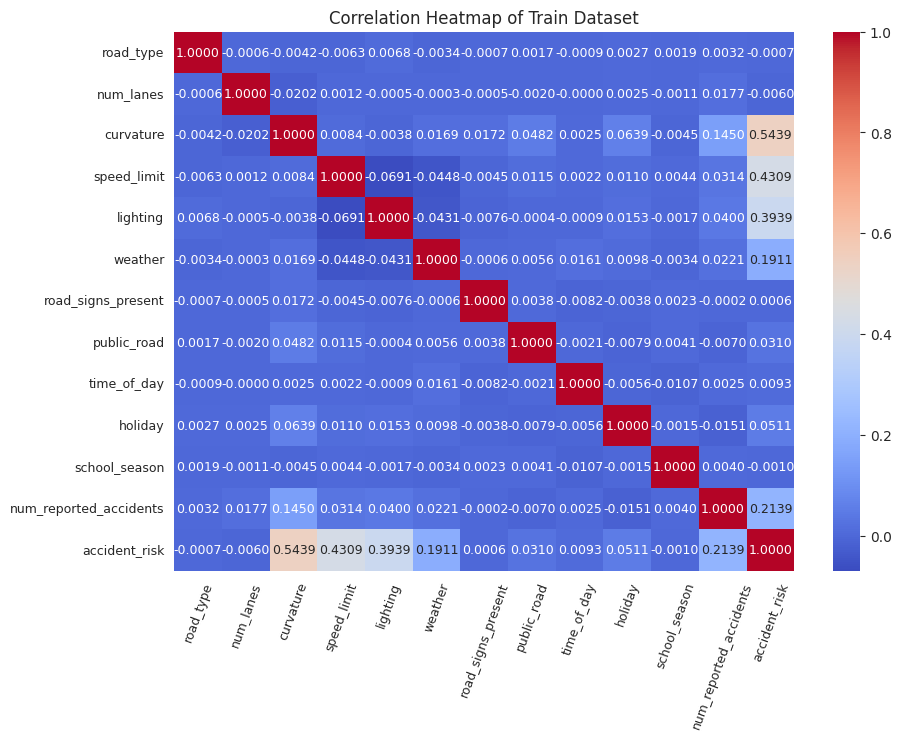

In [17]:
# Correlation Heatmap of Train Dataset

plt.figure(figsize=(10, 7))
heatmap=sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".4f", annot_kws={"size":9})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=70, fontsize=9)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=9)
plt.title('Correlation Heatmap of Train Dataset')
plt.show()

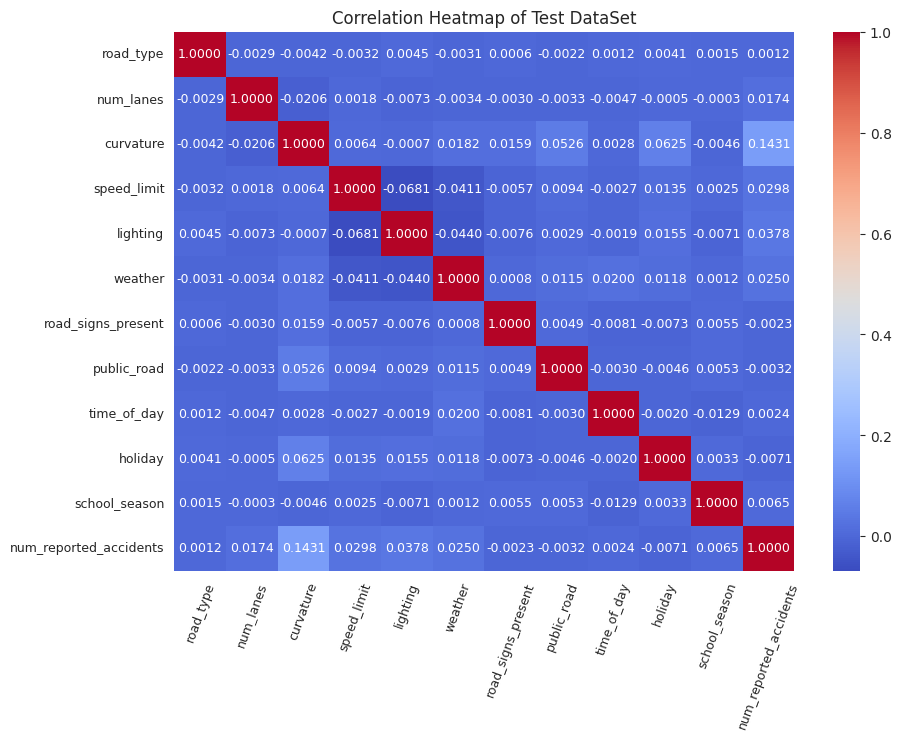

In [18]:
# Correlation Heatmap of Test Dataset

plt.figure(figsize=(10, 7))
heatmap=sns.heatmap(test.corr(), annot=True, cmap='coolwarm', fmt=".4f", annot_kws={"size":9})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=70, fontsize=9)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=9)
plt.title('Correlation Heatmap of Test DataSet')
plt.show()

# <span style="font-size:3px; color:#FFFFFF;"> Model Construction:</span>
<p style="
 font-family: 'Meiryo UI';
 font-size: 28px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #2060A0; 
 display: inline-block;
 border-radius: 5px;
 padding: 12px 70px;
 margin-left: 0px;
">
 Model Construction and Evaluation
</p>

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
Preparing Input Data
</p>

In [19]:
# Prepare input data
X_train = train.drop(['accident_risk'], axis=1)
y_train = train['accident_risk']

# Split the dataset into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [20]:
print("X_train Summary: First Rows, Shape, Dtypes")

display(X_train.head(10).T, X_train.shape, X_train.dtypes)

X_train Summary: First Rows, Shape, Dtypes


id,143159,20172,57926,193319,213938,105171,361722,147036,476238,163516
road_type,-1.224837,1.220336,-0.002250,-0.002250,-1.224837,1.220336,-0.002250,1.220336,1.220336,-0.002250
num_lanes,-0.438680,1.346344,-1.331192,0.453832,0.453832,1.346344,-1.331192,-0.438680,-0.438680,-0.438680
curvature,-0.215433,-1.132653,-1.059275,1.178740,-0.215433,0.811852,-1.536229,1.031985,-0.765765,-1.646295
speed_limit,0.879591,-1.337212,1.512963,0.879591,-0.703840,-1.337212,1.512963,0.879591,-0.070467,-1.337212
lighting,0.053230,1.300182,1.300182,-1.193722,1.300182,0.053230,1.300182,0.053230,-1.193722,-1.193722
weather,-1.202979,-1.202979,-1.202979,1.192997,-0.004991,1.192997,-1.202979,-1.202979,-1.202979,-1.202979
road_signs_present,-0.998410,-0.998410,-0.998410,1.001593,-0.998410,-0.998410,1.001593,1.001593,-0.998410,1.001593
public_road,-1.004522,-1.004522,0.995498,-1.004522,0.995498,-1.004522,0.995498,0.995498,0.995498,0.995498
time_of_day,0.001353,0.001353,-1.221485,1.224192,-1.221485,1.224192,0.001353,1.224192,1.224192,-1.221485
holiday,0.993029,0.993029,0.993029,0.993029,0.993029,0.993029,0.993029,0.993029,0.993029,-1.007020


(414203, 12)

road_type                 float64
num_lanes                 float64
curvature                 float64
speed_limit               float64
lighting                  float64
weather                   float64
road_signs_present        float64
public_road               float64
time_of_day               float64
holiday                   float64
school_season             float64
num_reported_accidents    float64
dtype: object

In [21]:
print("y_train Summary (First Rows,  Shape,  Data Types)")

display(y_train.head(10), y_train.shape)

y_train Summary (First Rows,  Shape,  Data Types)


id
143159    0.28
20172     0.27
57926     0.51
193319    0.58
213938    0.42
105171    0.23
361722    0.47
147036    0.46
476238    0.18
163516    0.01
Name: accident_risk, dtype: float64

(414203,)

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
Model Architecture
</p>

2025-10-08 13:59:51.236414: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,777 (108.50 KB)

 Trainable params: 27,137 (106.00 KB)

 Non-trainable params: 640 (2.50 KB)

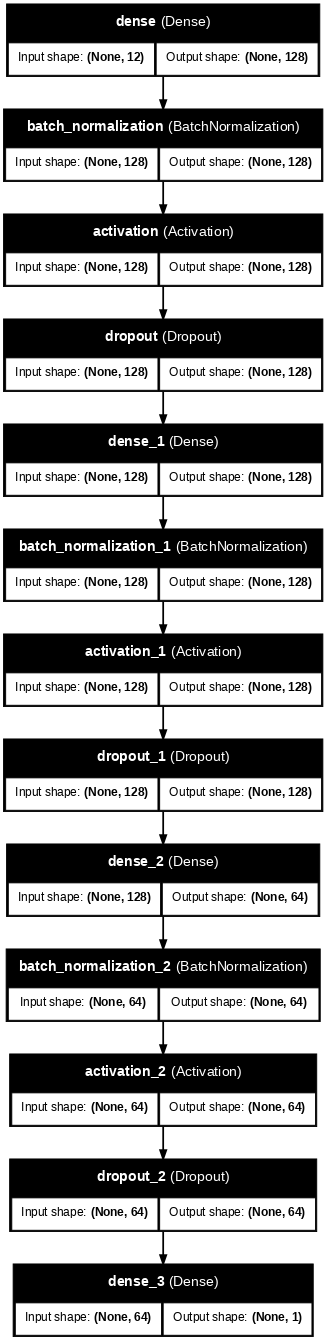

In [22]:
# MLP-based DNN Model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(128, kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),
    
    Dense(128, kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),
    
    Dense(64, kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Show the model summary
model.summary()
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True, dpi=63)

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
Model Training
</p>

In [23]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch+1}/{self.params["epochs"]} - Val RMSE: {logs["val_root_mean_squared_error"]}')

# Model Training
search = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    batch_size=2048,
    callbacks=[early_stopping, CustomCallback()],
    validation_data=(X_val, y_val),
    verbose=0
)

# Best Val RMSE
best_rmse = min(search.history['val_root_mean_squared_error'])  
print("\nBest Val RMSE : ", best_rmse)

Epoch 1/50 - Val RMSE: 0.1269810050725937
Epoch 2/50 - Val RMSE: 0.08335703611373901
Epoch 3/50 - Val RMSE: 0.07122214883565903
Epoch 4/50 - Val RMSE: 0.07094921916723251
Epoch 5/50 - Val RMSE: 0.07046924531459808
Epoch 6/50 - Val RMSE: 0.06719206273555756
Epoch 7/50 - Val RMSE: 0.06305121630430222
Epoch 8/50 - Val RMSE: 0.06305555254220963
Epoch 9/50 - Val RMSE: 0.06323793530464172
Epoch 10/50 - Val RMSE: 0.06586962938308716
Epoch 11/50 - Val RMSE: 0.06444606930017471
Epoch 12/50 - Val RMSE: 0.06382711231708527
Epoch 13/50 - Val RMSE: 0.06401100009679794
Epoch 14/50 - Val RMSE: 0.06219340115785599
Epoch 15/50 - Val RMSE: 0.06361141055822372
Epoch 16/50 - Val RMSE: 0.059321142733097076
Epoch 17/50 - Val RMSE: 0.0628654956817627
Epoch 18/50 - Val RMSE: 0.060710977762937546
Epoch 19/50 - Val RMSE: 0.06048554182052612
Epoch 20/50 - Val RMSE: 0.05794982239603996
Epoch 21/50 - Val RMSE: 0.05906529352068901
Epoch 22/50 - Val RMSE: 0.05758098512887955
Epoch 23/50 - Val RMSE: 0.058304667472839

Plot the evolution of RMSE during training


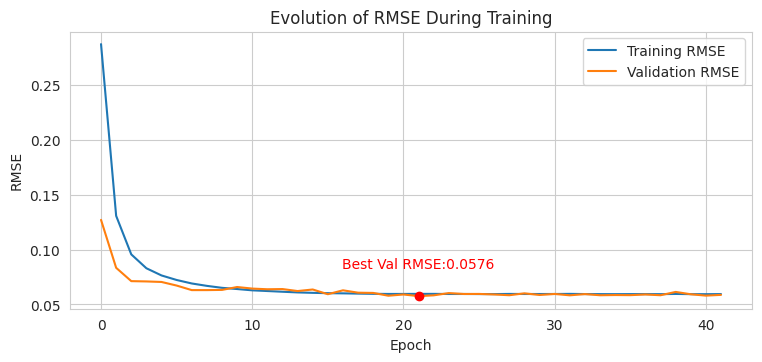

In [24]:
print("Plot the evolution of RMSE during training")

val_rmse_array = np.array(search.history['val_root_mean_squared_error'])

best_val_epoch = val_rmse_array.argmin()
best_val_rmse = val_rmse_array[best_val_epoch]

# Create figure and plot RMSE
plt.figure(figsize=(8.8, 3.6))
plt.plot(search.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(search.history['val_root_mean_squared_error'], label='Validation RMSE')

plt.plot(best_val_epoch, best_val_rmse, 'ro')
plt.text(best_val_epoch+0, best_val_rmse*1.4, f'Best Val RMSE:{best_val_rmse:.4f}',
         fontsize=10, color='red', verticalalignment='bottom', horizontalalignment='center')

plt.title('Evolution of RMSE During Training')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
Model Evaluation with RMSE
</p>

In [25]:
# Predict on training and validation data
y_train_pred = model.predict(X_train)
y_val_pred   = model.predict(X_val)

# Calculate RMSE
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_val   = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"RMSE_train : {RMSE_train:.4f}")
print(f"RMSE_val   : {RMSE_val:.4f}")

12944/12944 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
3236/3236 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
RMSE_train : 0.0573
RMSE_val   : 0.0576


<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
Validation Predictions
</p>

Comparison of True vs Predicted Values (Validation Set)


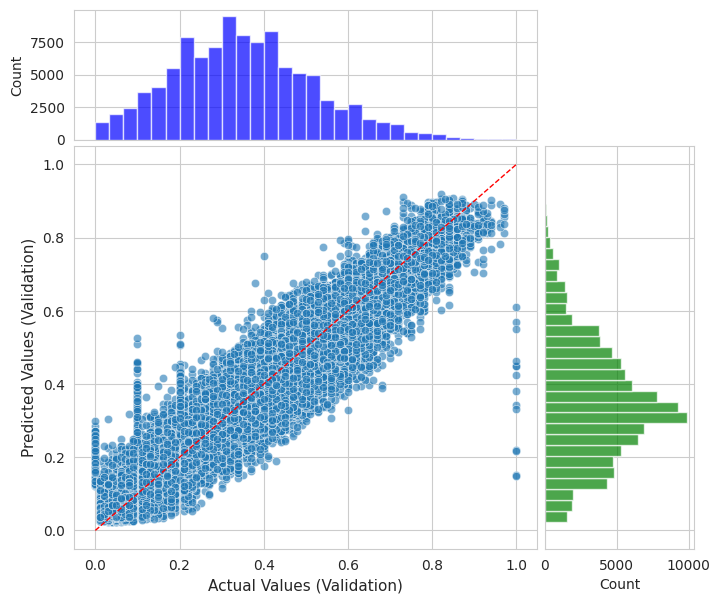

In [26]:
print("Comparison of True vs Predicted Values (Validation Set)")

y_true = y_val
y_pred = y_val_pred

fig = plt.figure(figsize=(8, 7))
grid = plt.GridSpec(4, 4, hspace=0.05, wspace=0.05)
ax_main = fig.add_subplot(grid[1:4, 0:3])
ax_xhist = fig.add_subplot(grid[0, 0:3], sharex=ax_main)
ax_yhist = fig.add_subplot(grid[1:4, 3], sharey=ax_main)
ax_main.scatter(y_true, y_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
ax_main.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', linewidth=1.0)

ax_xhist.hist(y_true, bins=30, color='blue', alpha=0.7)
ax_xhist.set_ylabel('Count')
ax_yhist.hist(y_pred, bins=30, orientation='horizontal', color='green', alpha=0.7)
ax_yhist.set_xlabel('Count')
plt.setp(ax_xhist.get_xticklabels(), visible=False)
plt.setp(ax_yhist.get_yticklabels(), visible=False)

ax_main.set_xlabel('Actual Values (Validation)', fontsize=11)
ax_main.set_ylabel('Predicted Values (Validation)', fontsize=11)
ax_main.grid(True)
plt.show()

 # <span style="font-size:3px; color:#FFFFFF;"> Submission:</span>

<p style="
 font-family: 'Meiryo UI';
 font-size: 28px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #2060A0; 
 display: inline-block;
 border-radius: 5px;
 padding: 12px 120px;
 margin-left: 0px;
">
 Submission
</p>

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
Test Data Predictions
</p>

In [27]:
# Predictions on Test Data

y_test_pred = model.predict(test)

5394/5394 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


In [28]:
print("Prediction Summary (Values, Shape, Dtype)\n")

print(y_test_pred.reshape(-1, 1), "\n")
print("Shape:", y_test_pred.shape, "\n")
print("Dtype:", y_test_pred.dtype)

Prediction Summary (Values, Shape, Dtype)

[[0.28926498]
 [0.12795708]
 [0.17073864]
 ...
 [0.24786083]
 [0.13220453]
 [0.498437  ]] 

Shape: (172585, 1) 

Dtype: float32


Distribution of Predicted Values on Test Data


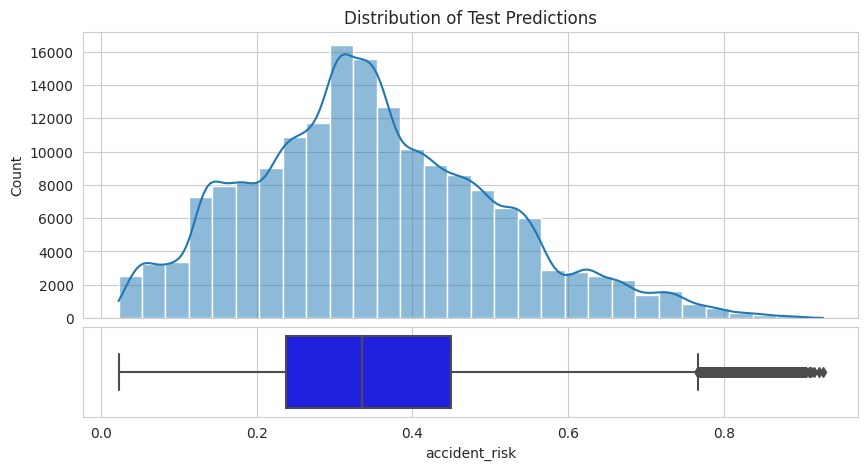

In [29]:
print("Distribution of Predicted Values on Test Data")

fig = plt.figure(figsize=(10, 5))
grid = plt.GridSpec(4, 1, hspace=0.1) 
ax_hist = fig.add_subplot(grid[0:3, 0]) 
ax_box = fig.add_subplot(grid[3, 0], sharex=ax_hist)

sns.histplot(y_test_pred, bins=30, kde=True, color='blue', ax=ax_hist, legend=False)
ax_hist.set_title("Distribution of Test Predictions")
ax_hist.set_xlabel("")

sns.boxplot(x=y_test_pred, ax=ax_box, color='blue')
ax_box.set_xlabel("accident_risk")

plt.setp(ax_hist.get_xticklabels(), visible=False)
plt.tight_layout()
plt.show()



Distribution of Predictions and True Values (Train / Validation / Test)


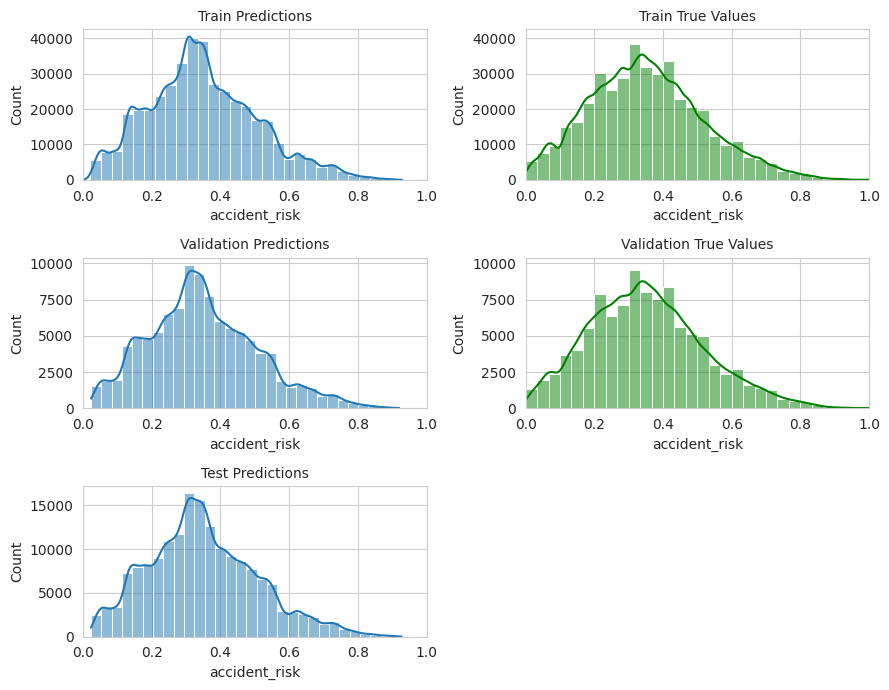

In [30]:
print("Distribution of Predictions and True Values (Train / Validation / Test)")

fig, axes = plt.subplots(3, 2, figsize=(9, 7))  # 3 rows × 2 columns
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Define data and corresponding subplot titles
data_pairs = [
    (y_train_pred, y_train, "Train"),
    (y_val_pred, y_val, "Validation"),
    (y_test_pred, None, "Test")
]

for i, (pred, true, label) in enumerate(data_pairs):
    row = i

    # Plot Predictions
    ax_pred = axes[row][0]
    sns.histplot(pred, bins=30, kde=True, color='blue', ax=ax_pred, legend=False)
    ax_pred.set_xlim(0, 1)
    ax_pred.set_xlabel("accident_risk")
    ax_pred.set_title(f"{label} Predictions", fontsize=10)

    # Get y-axis limit from prediction plot
    y_max = ax_pred.get_ylim()[1]

    # Plot True Values
    ax_true = axes[row][1]
    if true is not None:
        sns.histplot(true, bins=30, kde=True, color='green', ax=ax_true, legend=False)
        ax_true.set_xlim(0, 1)
        ax_true.set_ylim(0, y_max)  # Match y-axis to prediction
        ax_true.set_xlabel("accident_risk")
        ax_true.set_title(f"{label} True Values", fontsize=10)
    else:
        ax_true.axis('off')  # Hide empty subplot

plt.tight_layout()
plt.show()

<p style="
 font-family: 'Meiryo UI';
 font-size: 24px; 
 font-weight: bold;
 color: #ffffff;
 background-color: #007040; 
 display: inline-block;
 border-radius: 15px;
 padding: 10px 35px;
 margin-left: 0px;
">
Create Submission File
</p>

In [31]:
# Load sample submission template
submission = pd.read_csv('/kaggle/input/playground-series-s5e10/sample_submission.csv')

# Display the sample submission DataFrame
display(submission)

,id,accident_risk
0,517754,0.352
1,517755,0.352
2,517756,0.352
3,517757,0.352
4,517758,0.352
...,...,...
172580,690334,0.352
172581,690335,0.352
172582,690336,0.352
172583,690337,0.352


In [32]:
# Insert predicted values into the 'accident_risk' column
submission['accident_risk'] = y_test_pred

# Save the completed submission file as CSV
submission.to_csv('submission.csv', index=False)

# Display the submission DataFrame
display(submission)

,id,accident_risk
0,517754,0.289265
1,517755,0.127957
2,517756,0.170739
3,517757,0.338899
4,517758,0.401545
...,...,...
172580,690334,0.127166
172581,690335,0.519573
172582,690336,0.247861
172583,690337,0.132205
